<a href="https://colab.research.google.com/github/delabi/Shinkansen/blob/main/Shinkansen_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Objective of the notebook**:

In this notebook, let us explore the given dataset, and also we will build ensemble and RNN models to get started.

**Objective of the competition**:

This is the problem of a Shinkansen (Bullet-Trains) of Japan. They aim to determine the relative importance of each parameter with regards to their contribution to the passenger travel experience. Provided is a random sample of individuals who travelled using their train. The on-time performance of the trains along with the passenger’s information is published in the CSV file named ‘Traveldata_train’.  These passengers were later asked to provide their feedback on various parameters related to the travel along with their overall experience. These collected details are made available in the survey report CSV labelled ‘Surveydata_train’.

In the survey, a passenger was explicitly asked whether they were delighted with their overall travel experience and that is captured in the data of the survey report under the variable labelled ‘Overall_Experience’.

The objective of this exercise is to understand which parameters play an important role in swaying passenger feedback towards a positive scale. We have test data containing Travel data and Survey data of passengers. Both the test data and the train data are collected at the same time and belong to the same company.

In [ ]:
!pip install xgboost hyperopt lightgbm catboost optuna -q

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_validate
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats import skew
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay
import statsmodels.api as sm
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from hyperopt import fmin, tpe, hp
import xgboost as xgb
import lightgbm as lgb
import catboost
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, f1_score
import optuna
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Great Learning MIT/Data/Hackathon/RealHack/Traveldata_train.csv')
train_sy = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Great Learning MIT/Data/Hackathon/RealHack/Surveydata_train.csv')
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Great Learning MIT/Data/Hackathon/RealHack/Sample_Submission.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Great Learning MIT/Data/Hackathon/RealHack/Traveldata_test.csv')
test_sy = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Great Learning MIT/Data/Hackathon/RealHack/Surveydata_test.csv')

In [ ]:
train_data.head()

In [ ]:
train_data.columns[train_data.dtypes=='object']

In [ ]:
train_data.shape

In [ ]:
train_data.describe()

In [ ]:
train_data.info()

In [ ]:
train_data.isnull().sum()

In [ ]:
train_data.isnull().sum().sum()

In [ ]:
for column in train_data.select_dtypes(include='object').columns:
    print(f"Column: {column}")
    print(train_data[column].value_counts())
    print()

In [ ]:
train_data.drop(['ID'],inplace=True, axis=1)

In [ ]:
from sklearn.impute import SimpleImputer

# Numerical columns
numerical_features = train_data.select_dtypes(include=['float64', 'int64']).columns
numerical_imputer = SimpleImputer(strategy='mean')
train_data[numerical_features] = numerical_imputer.fit_transform(train_data[numerical_features])

# Categorical columns
categorical_features = train_data.select_dtypes(include=['object']).columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
train_data[categorical_features] = categorical_imputer.fit_transform(train_data[categorical_features])

In [ ]:
train_data.isnull().sum()

In [ ]:
train_data.head()

In [ ]:
train_data.info()

In [ ]:
train_data['Age'] = train_data['Age'].astype('int')
train_data['Travel_Distance'] = train_data['Travel_Distance'].astype('int')
train_data['Departure_Delay_in_Mins'] = train_data['Departure_Delay_in_Mins'].astype('int')
train_data['Arrival_Delay_in_Mins'] = train_data['Arrival_Delay_in_Mins'].astype('int')

In [ ]:
train_data.info()

In [ ]:
train_data = pd.get_dummies(train_data, columns=list(train_data.select_dtypes(include=['object']).columns))
train_data.head()

In [ ]:
train_data.shape

In [ ]:
train_sy.shape

In [ ]:
train_sy.head()

In [ ]:
train_sy.describe()

In [ ]:
train_sy.info()

In [ ]:
train_sy.isnull().sum()

In [ ]:
categorical_features = train_sy.select_dtypes(include=['object']).columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
train_sy[categorical_features] = categorical_imputer.fit_transform(train_sy[categorical_features])

In [ ]:
train_sy.drop(['ID'],axis=1,inplace=True)

In [ ]:
train_sy = pd.get_dummies(train_sy, columns=list(train_sy.select_dtypes(include=['object']).columns))
train_sy.head()

In [ ]:
train_sy.info()

In [ ]:
overall_experience_col = train_sy.pop('Overall_Experience')
train_sy['Overall_Experience'] = overall_experience_col

In [ ]:
train_sy.shape

In [ ]:
train_df = pd.concat([train_data, train_sy], axis=1)
train_df.shape

In [ ]:
train_df.columns

In [ ]:
train_df.isnull().sum().sum()

In [ ]:
train_df.info()

In [ ]:
train_df.select_dtypes(include=['int64']).columns

In [ ]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

columns_to_remove_outliers = ['Travel_Distance', 'Departure_Delay_in_Mins','Arrival_Delay_in_Mins']

for column in columns_to_remove_outliers:
    train_df_imputed = remove_outliers_iqr(train_df, column)

In [ ]:
train_df_imputed.shape

In [ ]:
train_df_imputed.head()

In [ ]:
X = train_df_imputed.drop(['Overall_Experience'], axis=1)
y = train_df_imputed['Overall_Experience']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
def objective(trial):
    # Define hyperparameters to optimize
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    cv_score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring=make_scorer(f1_score)).mean()

    return cv_score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

best_params = study.best_params

final_model = RandomForestClassifier(**best_params, random_state=42)
final_model.fit(X_train_scaled, y_train)

predictions = final_model.predict(X_test_scaled)

test_score = f1_score(y_test, predictions)

[I 2024-12-09 02:00:12,998] A new study created in memory with name: no-name-cdac640f-0666-424b-a750-20613177f3c5
[I 2024-12-09 02:00:32,154] Trial 0 finished with value: 0.9519764654775804 and parameters: {'n_estimators': 70, 'max_depth': 18}. Best is trial 0 with value: 0.9519764654775804.
[I 2024-12-09 02:00:40,316] Trial 1 finished with value: 0.9256127084431686 and parameters: {'n_estimators': 52, 'max_depth': 8}. Best is trial 0 with value: 0.9519764654775804.
[I 2024-12-09 02:00:51,501] Trial 2 finished with value: 0.9409644252252338 and parameters: {'n_estimators': 54, 'max_depth': 12}. Best is trial 0 with value: 0.9519764654775804.
[I 2024-12-09 02:01:22,010] Trial 3 finished with value: 0.9529043599562235 and parameters: {'n_estimators': 115, 'max_depth': 20}. Best is trial 3 with value: 0.9529043599562235.
[I 2024-12-09 02:02:16,249] Trial 4 finished with value: 0.954586614182863 and parameters: {'n_estimators': 181, 'max_depth': 25}. Best is trial 4 with value: 0.954586614

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9506973330070957

In [ ]:
train_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Great Learning MIT/Data/Hackathon/RealHack/train.csv')
train_df_imputed.to_csv('/content/drive/MyDrive/Colab Notebooks/Great Learning MIT/Data/Hackathon/RealHack/train_outlier.csv')

In [ ]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train_scaled, y_train)
pred_class_test = KNN_model.predict(X_test)
accuracy = accuracy_score(y_test, pred_class_test)
accuracy

0.46017861512111574

In [ ]:
def objective(trial):

    n_estimators = trial.suggest_int(name="n_estimators", low=100, high=500, step=100)
    max_features = trial.suggest_categorical(name="max_features", choices=['sqrt', 'log2'])
    max_depth = trial.suggest_int(name="max_depth", low=10, high=110, step=20)
    min_samples_split = trial.suggest_int(name="min_samples_split", low=2, high=10, step=2)
    min_samples_leaf = trial.suggest_int(name="min_samples_leaf", low=1, high=4, step=1)

    params = {
        "n_estimators": n_estimators,
        "max_features": max_features,
        "max_depth": max_depth,
        "min_samples_split": min_samples_split,
        "min_samples_leaf": min_samples_leaf
    }
    model = RandomForestClassifier(random_state=42, **params)

    cv_score = cross_val_score(model, X_train_scaled, y_train, n_jobs=-1, cv=5)
    mean_cv_accuracy = cv_score.mean()
    return mean_cv_accuracy

study = optuna.create_study()
study.optimize(objective, n_trials=10)

best_model = RandomForestClassifier(random_state=42, **study.best_params)
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train_scaled, y_train)

predictions = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, predictions)
accuracy

[I 2024-12-09 02:05:15,152] A new study created in memory with name: no-name-08a36d1c-063b-43fa-b4d4-ec6598e6295d
[I 2024-12-09 02:05:35,423] Trial 0 finished with value: 0.9446865958524351 and parameters: {'n_estimators': 400, 'max_features': 'log2', 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.9446865958524351.
[I 2024-12-09 02:05:45,991] Trial 1 finished with value: 0.9444877816797685 and parameters: {'n_estimators': 200, 'max_features': 'log2', 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.9444877816797685.
[I 2024-12-09 02:06:11,146] Trial 2 finished with value: 0.9264271768507916 and parameters: {'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 2 with value: 0.9264271768507916.
[I 2024-12-09 02:06:30,932] Trial 3 finished with value: 0.944334870636439 and parameters: {'n_estimators': 300, 'max_features': 'sqr

0.9506973330070957

In [ ]:
def objective(params):
    clf = xgb.XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        learning_rate=params['learning_rate'],
        subsample=params['subsample'],
    )

    # Use cross-validation to estimate the model's performance
    scores = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring="neg_log_loss")

    # Hyperopt aims to minimize the objective function, so negate the scores
    return -scores.mean()

# Define the hyperparameter search space
space = {
    'n_estimators': hp.choice('n_estimators', range(50, 200)),
    'max_depth': hp.choice('max_depth', range(1, 15)),
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'subsample': hp.uniform('subsample', 0.5, 1),
}

# Run the hyperparameter optimization
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100)

clf = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    **best
)

clf.fit(X_train_scaled, y_train)
predictions = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
accuracy

100%|██████████| 100/100 [10:18<00:00,  6.19s/trial, best loss: 0.10649572506224769]


0.951247859065329

In [ ]:
my_data = pd.read_csv('Submission_cat.csv')
my_data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Submission_cat.csv'

In [ ]:
my_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Great Learning MIT/Data/Hackathon/RealHack/Submission_cat.csv', index=False)
my_data.to_csv('Submission_cat.csv', index=False)


In [ ]:
def objective(params):
    clfx = catboost.CatBoostClassifier(
        iterations=params['iterations'],
        depth=params['depth'],
        learning_rate=params['learning_rate'],
        l2_leaf_reg=params['l2_leaf_reg'],
        verbose=0,
    )

    # Use StratifiedKFold for better handling of imbalanced datasets
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Use cross-validation to estimate the model's performance
    scores = cross_val_score(clfx, X_train_scaled, y_train, cv=cv, scoring="neg_log_loss", n_jobs=-1)

    # Hyperopt aims to minimize the objective function, so negate the scores
    return -scores.mean()

# Define the hyperparameter search space
space = {
    'iterations': hp.choice('iterations', range(100, 1000)),
    'depth': hp.choice('depth', range(1, 12)),
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'l2_leaf_reg': hp.loguniform('l2_leaf_reg', -5, 5),
}

# Run the hyperparameter optimization
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50)
clf1 = catboost.CatBoostClassifier(
    verbose=0,
    **best
)
# Scale the entire dataset X using the same scaler used for training
X_scaled = scaler.fit_transform(X)

clf1.fit(X_scaled, y)
predictions = clf1.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
accuracy

100%|██████████| 50/50 [27:00<00:00, 32.42s/trial, best loss: 0.10482144578155875]


0.9765108881820406

In [ ]:
X_test_scaled.shape

(16348, 97)

In [ ]:
best_params = {'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 110, 'min_samples_split': 4, 'min_samples_leaf': 3}
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_scaled, y)
predictions = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9798140445314412

In [ ]:
predictions = clf1.predict(X_test_scaled)+clf.predict(X_test_scaled)+best_model.predict(X_test_scaled)
predictions = np.array([int(x) for x in (predictions>0.4)])
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9683141668705652

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Great Learning MIT/Data/Hackathon/RealHack/train.csv',index_col=[0])
X1 = df.drop(['Overall_Experience'], axis=1)
X1_scaled = scaler.fit_transform(X1)
y1 = df['Overall_Experience']
def objective(params):
    clfx = catboost.CatBoostClassifier(
        iterations=params['iterations'],
        depth=params['depth'],
        learning_rate=params['learning_rate'],
        l2_leaf_reg=params['l2_leaf_reg'],
        verbose=0,
    )

    # Use cross-validation to estimate the model's performance
    scores = cross_val_score(clfx, X1_scaled, y1, cv=5, scoring="neg_log_loss")

    # Hyperopt aims to minimize the objective function, so negate the scores
    return -scores.mean()

# Define the hyperparameter search space
space = {
    'iterations': hp.choice('iterations', range(100, 1000)),
    'depth': hp.choice('depth', range(1, 12)),
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'l2_leaf_reg': hp.loguniform('l2_leaf_reg', -5, 5),
}

# Run the hyperparameter optimization
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50)
clf2 = catboost.CatBoostClassifier(
    verbose=0,
    **best
)

clf2.fit(X1_scaled, y1)
predictions = clf2.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
accuracy

100%|██████████| 50/50 [44:20<00:00, 53.22s/trial, best loss: 0.09984709378349148]


0.9863591876682163

In [ ]:

def objective(params):
    clfx = catboost.CatBoostClassifier(
        iterations=params['iterations'],
        depth=params['depth'],
        learning_rate=params['learning_rate'],
        l2_leaf_reg=params['l2_leaf_reg'],
        verbose=0,
        loss_function="Logloss",
        task_type="GPU",
        random_seed=432013,
        od_type="Iter",
    )

    # Use cross-validation to estimate the model's performance
    scores = cross_val_score(clfx, X1_scaled, y1, cv=4, scoring="neg_log_loss")

    # Hyperopt aims to minimize the objective function, so negate the scores
    return -scores.mean()

# Define the hyperparameter search space
space = {
    'iterations': hp.choice('iterations', range(100, 1000)),
    'depth': hp.choice('depth', range(1, 12)),
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'l2_leaf_reg': hp.loguniform('l2_leaf_reg', -5, 5),
}

# Run the hyperparameter optimization
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100)
print(best)
clf3 = catboost.CatBoostClassifier(
    verbose=0,
    **best,
    task_type="GPU",
    devices='0:1',
    od_type="Iter"
)

clf3.fit(X1_scaled, y1)
predictions = clf3.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
accuracy

100%|██████████| 100/100 [1:04:48<00:00, 38.89s/trial, best loss: 0.10405156143623914]
{'depth': 8, 'iterations': 854, 'l2_leaf_reg': 1.8881132456306529, 'learning_rate': 0.031838511833878286}


0.9702715928553951

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 97))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from keras.optimizers import SGD
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train_scaled, y_train, batch_size = 32, epochs = 500,callbacks=[early_stopping], validation_split=0.2)

Epoch 1/500
1635/1635 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7906 - loss: 0.4206 - val_accuracy: 0.9248 - val_loss: 0.1850
Epoch 2/500
1635/1635 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9147 - loss: 0.2353 - val_accuracy: 0.9365 - val_loss: 0.1590
Epoch 3/500
1635/1635 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9207 - loss: 0.2101 - val_accuracy: 0.9372 - val_loss: 0.1518
Epoch 4/500
1635/1635 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9240 - loss: 0.1997 - val_accuracy: 0.9408 - val_loss: 0.1441
Epoch 5/500
1635/1635 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9275 - loss: 0.1872 - val_accuracy: 0.9407 - val_loss: 0.1385
Epoch 6/500
1635/1635 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9280 - loss: 0.1840 - val_accuracy: 0.9421 - val_loss: 0.1431
Epoch 7/500
1635/1635 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9327 - loss: 0.1748 - val_accuracy: 0.9423 - val_loss: 0.1361
Epoch 8/500
1635/1635 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9294 - loss: 0

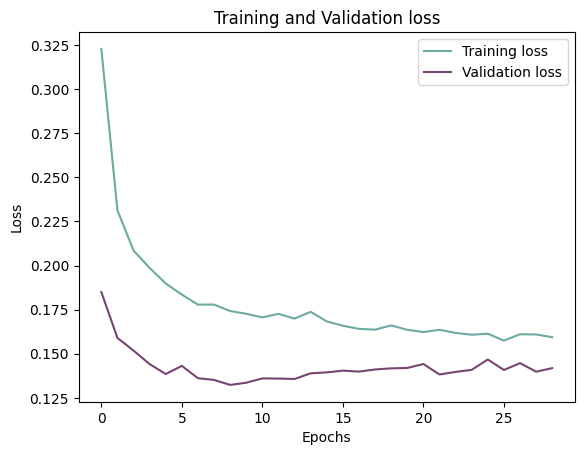

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#6daa9f", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#774571", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

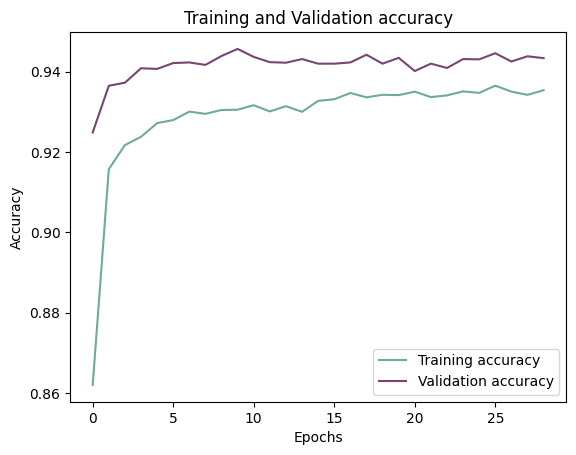

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#774571", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 94.16%


In [ ]:
predictions = model.predict(X_test_scaled)
predictions = (predictions > 0.5)
accuracy = accuracy_score(y_test, predictions)
accuracy

511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.9434181551260094

In [ ]:
from tensorflow.keras.optimizers import Adamax
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initialising the NN
model1 = Sequential()

# layers
model1.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 97))
# model1.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
# model1.add(Dropout(0.25))
model1.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model1.add(Dropout(0.3))
model1.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model1.add(Dropout(0.3))
model1.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model1.compile(optimizer = Adamax(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model1.fit(X_train_scaled, y_train, batch_size = 128, epochs = 500,callbacks=[early_stopping], validation_split=0.2)

Epoch 1/500
409/409 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5508 - loss: 0.6929 - val_accuracy: 0.5592 - val_loss: 0.6920
Epoch 2/500
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5622 - loss: 0.6914 - val_accuracy: 0.5592 - val_loss: 0.6884
Epoch 3/500
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5871 - loss: 0.6865 - val_accuracy: 0.7566 - val_loss: 0.6771
Epoch 4/500
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7523 - loss: 0.6720 - val_accuracy: 0.8677 - val_loss: 0.6491
Epoch 5/500
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8261 - loss: 0.6392 - val_accuracy: 0.8709 - val_loss: 0.5961
Epoch 6/500
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8339 - loss: 0.5839 - val_accuracy: 0.8724 - val_loss: 0.5190
Epoch 7/500
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8349 - loss: 0.5190 - val_accuracy: 0.8752 - val_loss: 0.4366
Epoch 8/500
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8394 - loss: 0.4607 - val_acc

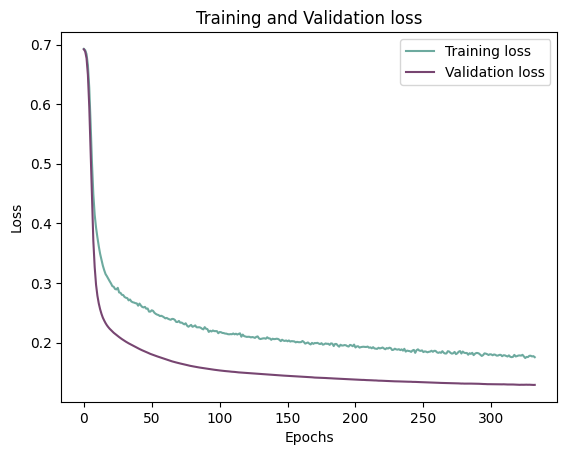

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#6daa9f", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#774571", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

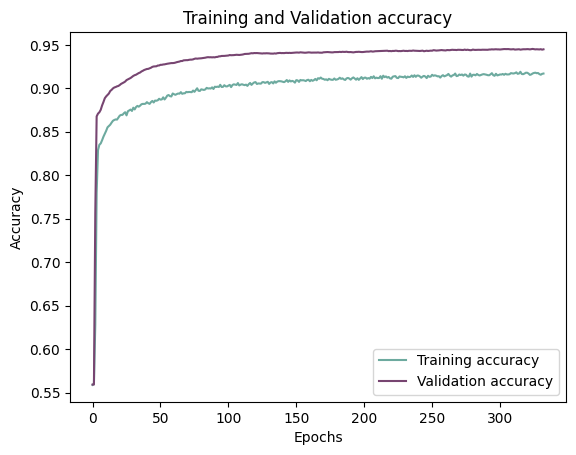

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#774571", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 93.31%


In [ ]:
predictions = model1.predict(X_test_scaled)
predictions = (predictions > 0.5)
accuracy = accuracy_score(y_test, predictions)
accuracy

511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.9462931245412283

In [ ]:
from tensorflow.keras.optimizers import Adamax, Adagrad, Adam, SGD
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initialising the NN
model1 = Sequential()

# layers
model1.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'selu', input_dim = 97))
# model1.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
# model1.add(Dropout(0.25))
model1.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'selu'))
model1.add(Dropout(0.3))
model1.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'selu'))
model1.add(Dropout(0.3))
model1.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model1.compile(optimizer = Adam(learning_rate=0.0005), loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model1.fit(X_train_scaled, y_train, batch_size = 4, epochs = 500,callbacks=[early_stopping], validation_split=0.2)

Epoch 1/500
13078/13078 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.8877 - loss: 0.2909 - val_accuracy: 0.9090 - val_loss: 0.2029
Epoch 2/500
13078/13078 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9054 - loss: 0.2196 - val_accuracy: 0.9264 - val_loss: 0.1710
Epoch 3/500
13078/13078 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9207 - loss: 0.1860 - val_accuracy: 0.9339 - val_loss: 0.1539
Epoch 4/500
13078/13078 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9340 - loss: 0.1619 - val_accuracy: 0.9394 - val_loss: 0.1478
Epoch 5/500
13078/13078 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9351 - loss: 0.1566 - val_accuracy: 0.9425 - val_loss: 0.1364
Epoch 6/500
13078/13078 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9399 - loss: 0.1421 - val_accuracy: 0.9460 - val_loss: 0.1304
Epoch 7/500
13078/13078 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9417 - loss: 0.1404 - val_accuracy: 0.9453 - val_loss: 0.1285
Epoch 8/500
13078/13078 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - ac

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#6daa9f", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#774571", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

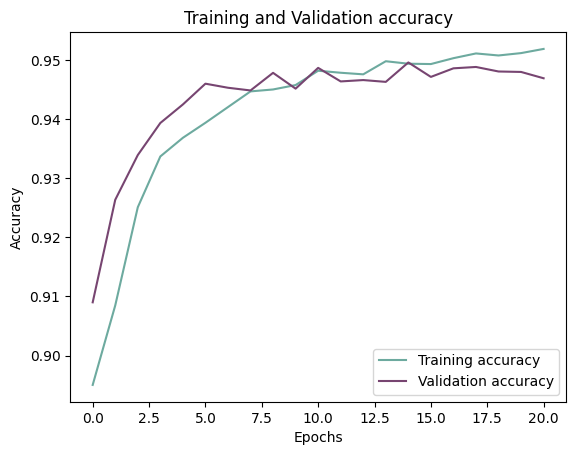

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#774571", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 94.31%


In [ ]:
predictions = model1.predict(X_test_scaled)
predictions = np.array([int(x[0]) for x in (predictions>0.5)])
accuracy = accuracy_score(y_test, predictions)
accuracy

511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


0.9483728896501101

In [ ]:
test_data.drop(['ID'],axis=1,inplace=True)
test_sy.drop(['ID'],axis=1, inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer

# Numerical columns
numerical_features = test_data.select_dtypes(include=['float64', 'int64']).columns
numerical_imputer = SimpleImputer(strategy='mean')
test_data[numerical_features] = numerical_imputer.fit_transform(test_data[numerical_features])

# Categorical columns
categorical_features = test_data.select_dtypes(include=['object']).columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
test_data[categorical_features] = categorical_imputer.fit_transform(test_data[categorical_features])

In [ ]:
test_data['Age'] = test_data['Age'].astype('int')
test_data['Travel_Distance'] = test_data['Travel_Distance'].astype('int')
test_data['Departure_Delay_in_Mins'] = test_data['Departure_Delay_in_Mins'].astype('int')
test_data['Arrival_Delay_in_Mins'] = test_data['Arrival_Delay_in_Mins'].astype('int')

In [ ]:
test_data = pd.get_dummies(test_data, columns=list(test_data.select_dtypes(include=['object']).columns))
test_data.head()

In [ ]:
test_data.shape

In [ ]:
categorical_features = test_sy.select_dtypes(include=['object']).columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
test_sy[categorical_features] = categorical_imputer.fit_transform(test_sy[categorical_features])

In [ ]:
test_sy = pd.get_dummies(test_sy, columns=list(test_sy.select_dtypes(include=['object']).columns))
test_sy.head()

In [ ]:
test_sy.info()

In [ ]:
train_columns = set(train_sy.columns)
test_columns = set(test_sy.columns)
column_difference = train_columns.difference(test_columns)
column_difference

In [ ]:
new_columns = {'Checkin_service_extremely poor',
               'Cleanliness_extremely poor',
               'Onboard_service_extremely poor',
               'Online_support_extremely poor',
               'Platform_location_very inconvinient'}

# Add new columns with zeroes
for column in new_columns:
    test_sy[column] = 0

In [ ]:
test_sy.shape

In [ ]:
# ordered_col = list(train_sy.columns)[:-1]
# test_sy = test_sy[ordered_col]

ordered_col = list(train_sy.columns)[:-1]
# Get the common columns between ordered_col and test_sy.columns
common_cols = [col for col in ordered_col if col in test_sy.columns]
test_sy = test_sy[common_cols]  # Use only common columns for indexing

In [ ]:
test_df = pd.concat([test_data, test_sy], axis=1)
test_df.shape

In [ ]:
columns_test_df = test_df.columns.tolist()
columns_X = X.columns.tolist()

# Check if both have the same order of columns
if columns_test_df == columns_X:
    print("Both dataframes have the same order of columns.")
else:
    print("The order of columns in the dataframes is different.")

In [ ]:
scaler = StandardScaler()
test_scaled = scaler.fit_transform(test_df)
predictions = clf1.predict(test_scaled)

# # Assuming X is your original training data and test_df is your test data
# # Get the columns that are in X but not in test_df
# missing_cols = set(X.columns) - set(test_df.columns)

# # Add the missing columns to test_df and fill them with 0
# for col in missing_cols:
#     test_df[col] = 0

# # Ensure the order of columns in test_df is the same as in X
# test_df = test_df[X.columns]

# # Now you can scale and predict
# scaler = StandardScaler()
# test_scaled = scaler.fit_transform(test_df)
# predictions = clf1.predict(test_scaled)

In [ ]:
# test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Great Learning MIT/Data/Hackathon/RealHack/Surveydata_test.csv")

In [ ]:
# test_data.head()

In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Great Learning MIT/Data/Hackathon/RealHack/Surveydata_test.csv")
# Create a DataFrame with player_id and corresponding predictions
result_df = pd.DataFrame({'ID': test_data['ID'], 'Overall_Experience': predictions})

# Save the predictions to a CSV file
result_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Great Learning MIT/Data/Hackathon/RealHack/Submission_cat.csv', index=False)

#--------

# test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Great Learning MIT/Data/Hackathon/RealHack/Surveydata_test.csv")

# # Assuming 'test_scaled' is the scaled version of the data used for predictions
# # and clf1 is your trained model
# predictions = clf1.predict(test_scaled)

# # Create a DataFrame with player_id and corresponding predictions, ensuring both have the same length
# result_df = pd.DataFrame({'ID': test_data['ID'], 'Overall_Experience': predictions})

# # Save the predictions to a CSV file
# result_df.to_csv('Submission_cat.csv', index=False)

#-------

# test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Great Learning MIT/Data/Hackathon/RealHack/Surveydata_test.csv")

# # Store the 'ID' column before preprocessing
# test_data_ids = test_data['ID']

# # Assuming X is your original training data and test_df is your test data
# # Get the columns that are in X but not in test_df
# missing_cols = set(X.columns) - set(test_data.columns) # Changed test_df to test_data

# # Add the missing columns to test_df and fill them with 0
# for col in missing_cols:
#     test_data[col] = 0  # Changed test_df to test_data

# # Ensure the order of columns in test_df is the same as in X
# test_data = test_data[X.columns]  # Changed test_df to test_data

# # Now you can scale and predict
# scaler = StandardScaler()
# test_scaled = scaler.fit_transform(test_data) # Changed test_df to test_data
# predictions = clf1.predict(test_scaled)


# # Create a DataFrame with player_id and corresponding predictions, ensuring both have the same length
# result_df = pd.DataFrame({'ID': test_data_ids, 'Overall_Experience': predictions}) # Changed test_data to test_data in this line as well

# # Save the predictions to a CSV file
# result_df.to_csv('Submission_cat.csv', index=False)

In [ ]:
result_df.shape

In [ ]:
test_sy.shape

In [ ]:
test_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Great Learning MIT/Data/Hackathon/RealHack/test.csv')

In [ ]:
test_df.head()